# Sea level predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

    # Create first line of best fit
    regress = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    last_year = df["Year"].max()
    df = df.append([{"Year": y} for y in range(last_year + 1, 2050)])
    plt.plot(
        df["Year"],
        regress.intercept + regress.slope * df["Year"],
        c="r",
        label="fit all",
    )
    # Create second line of best fit
    df_recent = df.loc[(df["Year"] >= 2000) & (df["Year"] <= last_year)]
    bestfit = linregress(df_recent["Year"], df_recent["CSIRO Adjusted Sea Level"])
    df_recent = df_recent.append(
        [{"Year": y} for y in range(last_year + 1, 2050)]
    )
    plt.plot(
        df_recent["Year"],
        bestfit.intercept + bestfit.slope * df_recent["Year"],
        c="b",
        label="fit recent",
    )
    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

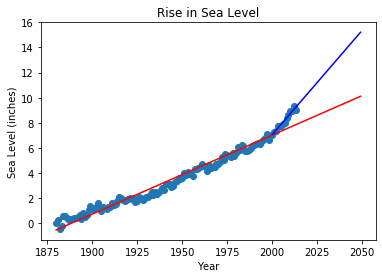

In [3]:
draw_plot()